In [757]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [758]:
data = pd.read_csv("cybersecurity_attacks.csv",sep=",")

In [760]:
data.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,...,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,...,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


<h2>Time Stamp</h2>

In [761]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%Y-%m-%d %H:%M:%S")
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour + (data['Timestamp'].dt.minute/60) + (data['Timestamp'].dt.second/3600)
data['Day of week'] = data['Timestamp'].dt.dayofweek
data['Is weekend'] = data['Day of week'].apply(lambda x: 1 if x >= 5 else 0)
data["Time of day"] = data["Hour"].apply(time_of_day)
data['Quarter'] = data['Timestamp'].dt.quarter
data['Week'] = data['Timestamp'].dt.isocalendar().week
data = data.drop(columns=['Timestamp'])
cols = ['Day', 'Month', 'Year', "Hour", "Time of day", "Day of week", "Is weekend", 'Quarter', 'Week']

print(data[cols])

       Day  Month  Year       Hour Time of day  Day of week  Is weekend  \
0       30      5  2023   6.566111     Morning            1           0   
1       26      8  2020   7.141667     Morning            2           0   
2       13     11  2022   8.390278     Morning            6           1   
3        2      7  2023  10.646111     Morning            6           1   
4       16      7  2023  13.185278   Afternoon            6           1   
...    ...    ...   ...        ...         ...          ...         ...   
39995   26      5  2023  14.145000   Afternoon            4           0   
39996   27      3  2023   0.640833       Night            0           0   
39997   31      3  2022   1.763611       Night            3           0   
39998   22      9  2023  18.543889     Evening            4           0   
39999   10     10  2023  11.997778     Morning            1           0   

       Quarter  Week  
0            2    22  
1            3    35  
2            4    45  
3      

In [762]:
data['Source IP Address'].nunique()

40000

In [763]:
data['Destination IP Address'].nunique()

40000

<h2>Ports</h2>

In [764]:
def port_category(port):
    if 0 <= port <= 1023:
        return "Well Known"
    elif 1024 <= port <= 49151:
        return "Registered"
    elif 49152 <= port <= 65535:
        return "Ephemeral"

data["Categorical Source Port"] = data["Source Port"].apply(port_category)
data["Categorical Destination Port"] = data["Destination Port"].apply(port_category)

In [765]:
data["Categorical Source Port"].value_counts()

Categorical Source Port
Registered    30121
Ephemeral      9879
Name: count, dtype: int64

In [766]:
data["Categorical Destination Port"].value_counts()

Categorical Destination Port
Registered    29926
Ephemeral     10074
Name: count, dtype: int64

<h2>Device Information</h2>

In [767]:
from ua_parser import parse

def parse_device_info(ua_string):
    ua = parse(ua_string)
    browser = ua.user_agent.family if ua.user_agent is not None else None
    browser_version = ua.user_agent.major if ua.user_agent is not None else None
    os = ua.os.family if ua.os is not None else None
    os_version = ua.os.major if ua.os is not None else None
    device = ua.device.model if ua.device is not None else "Other"

    s = ua_string.split(")")[1]
    engine = s.split("/")[0]
    engine = engine.replace(" ","")
    if engine == "":
        engine = "Trident"

    return browser, browser_version, os, os_version, device, engine

data[["Browser", "Browser Version", "OS", "OS Version", "Device", "Engine"]] = data['Device Information'].apply(lambda x: pd.Series(parse_device_info(x)))

In [768]:
grouped = data.groupby('Attack Type')['Malware Indicators'].value_counts(dropna=False)
print(grouped)

Attack Type  Malware Indicators
DDoS         NaN                   6774
             IoC Detected          6654
Intrusion    IoC Detected          6665
             NaN                   6600
Malware      IoC Detected          6681
             NaN                   6626
Name: count, dtype: int64


In [769]:
data = data.drop(['Destination IP Address','Source IP Address',"User Information","Payload Data","Malware Indicators","IDS/IPS Alerts","Alerts/Warnings","Source Port","Destination Port","Device Information","Geo-location Data",'Day', 'Month', 'Year', "Hour",'Quarter', 'Week', "Device", "Engine"], axis=1)

# Traitement

In [770]:
data = pd.get_dummies(data, columns=['Protocol','Packet Type','Traffic Type','Attack Signature','Action Taken','Network Segment','Log Source','Time of day','Categorical Source Port','Categorical Destination Port',"Browser", "OS"], drop_first=True)

In [771]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Severity Level'] = le.fit_transform(data['Severity Level'])
data['Browser Version'] = le.fit_transform(data['Browser Version'])
#data['Source IP Address'] = le.fit_transform(data['Source IP Address'])
#data['Destination IP Address'] = le.fit_transform(data['Destination IP Address'])


In [772]:
data.isna().sum()

Packet Length                                  0
Anomaly Scores                                 0
Attack Type                                    0
Severity Level                                 0
Proxy Information                          19851
Firewall Logs                              19961
Day of week                                    0
Is weekend                                     0
Browser Version                                0
OS Version                                  7171
Protocol_TCP                                   0
Protocol_UDP                                   0
Packet Type_Data                               0
Traffic Type_FTP                               0
Traffic Type_HTTP                              0
Attack Signature_Known Pattern B               0
Action Taken_Ignored                           0
Action Taken_Logged                            0
Network Segment_Segment B                      0
Network Segment_Segment C                      0
Log Source_Server   

In [773]:
data = data.drop(["OS Version","Firewall Logs","Proxy Information","Day of week"], axis=1)

In [774]:
data.head(10)

,Packet Length,Anomaly Scores,Attack Type,Severity Level,Is weekend,Browser Version,Protocol_TCP,Protocol_UDP,Packet Type_Data,Traffic Type_FTP,...,Browser_Firefox Mobile,Browser_Firefox iOS,Browser_IE,Browser_Mobile Safari,Browser_Opera,Browser_Safari,OS_Linux,OS_Mac OS X,OS_Windows,OS_iOS
0,503,28.67,Malware,1,0,65,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1174,51.50,Malware,1,0,64,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,306,87.42,DDoS,1,1,65,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,385,15.79,Malware,2,1,1,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
4,1462,0.52,DDoS,1,1,42,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
5,1423,5.76,Malware,2,0,64,False,True,True,False,...,False,False,False,False,True,False,True,False,False,False
6,379,31.55,DDoS,0,0,65,True,False,True,False,...,False,False,False,False,True,False,True,False,False,False
7,1022,54.05,Intrusion,0,1,37,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
8,1281,56.34,Intrusion,0,0,29,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9,224,16.51,Malware,2,1,31,False,True,True,False,...,False,False,False,False,False,True,False,False,True,False


In [775]:
data.isna().sum()

Packet Length                              0
Anomaly Scores                             0
Attack Type                                0
Severity Level                             0
Is weekend                                 0
Browser Version                            0
Protocol_TCP                               0
Protocol_UDP                               0
Packet Type_Data                           0
Traffic Type_FTP                           0
Traffic Type_HTTP                          0
Attack Signature_Known Pattern B           0
Action Taken_Ignored                       0
Action Taken_Logged                        0
Network Segment_Segment B                  0
Network Segment_Segment C                  0
Log Source_Server                          0
Time of day_Evening                        0
Time of day_Morning                        0
Time of day_Night                          0
Categorical Source Port_Registered         0
Categorical Destination Port_Registered    0
Browser_Ch

In [776]:
data.to_csv('extracted data.csv', index=False)

# Model training

In [777]:
from sklearn.model_selection import train_test_split

In [778]:
data.dtypes

Packet Length                                int64
Anomaly Scores                             float64
Attack Type                                 object
Severity Level                               int32
Is weekend                                   int64
Browser Version                              int32
Protocol_TCP                                  bool
Protocol_UDP                                  bool
Packet Type_Data                              bool
Traffic Type_FTP                              bool
Traffic Type_HTTP                             bool
Attack Signature_Known Pattern B              bool
Action Taken_Ignored                          bool
Action Taken_Logged                           bool
Network Segment_Segment B                     bool
Network Segment_Segment C                     bool
Log Source_Server                             bool
Time of day_Evening                           bool
Time of day_Morning                           bool
Time of day_Night              

In [779]:
df_train, df_test = train_test_split(data,test_size = 0.2)

In [780]:
# get the values of the columns for the training data
X_train = df_train.loc[:, df_train.columns != 'Attack Type'].values
y_train = df_train['Attack Type'].values

In [781]:
# get the values of the columns for the test data
X_test = df_test.loc[:, df_test.columns != 'Attack Type'].values
y_test = df_test['Attack Type'].values

In [782]:
# Encoder y_train et y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [783]:
from sklearn.linear_model import LogisticRegression

In [784]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000)

In [785]:
# here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

C:\Users\Ken\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [786]:
y_test_predicted = lr_model.predict(X_test)

In [787]:
from sklearn.metrics import classification_report

In [788]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)

In [789]:
print(report)

              precision    recall  f1-score   support

           0       0.32      0.43      0.37      2599
           1       0.33      0.25      0.29      2693
           2       0.35      0.31      0.33      2708

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



# XGBoost

In [790]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoder y_train et y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [791]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=0, max_depth=6, learning_rate=0.1, n_estimators=100, verbosity=0)

# Train the model on training data
xgb_model.fit(X=X_train, y=y_train)

# Make predictions on test data
y_test_predicted_xgb = xgb_model.predict(X_test)

# Generate classification report
report_xgb = classification_report(y_true=y_test, y_pred=y_test_predicted_xgb)

# Print results
print("XGBoost Classification Report:")
print(report_xgb)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.38      0.35      2599
           1       0.34      0.29      0.31      2693
           2       0.33      0.33      0.33      2708

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



Distribution des classes:
0    10829
2    10599
1    10572
Name: count, dtype: int64

Proportions:
0    0.338406
2    0.331219
1    0.330375
Name: proportion, dtype: float64
XGBoost v2 Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.38      0.35      2599
           1       0.34      0.27      0.30      2693
           2       0.34      0.33      0.34      2708

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000


Confusion Matrix:
[[ 994  707  898]
 [1079  733  881]
 [1083  721  904]]


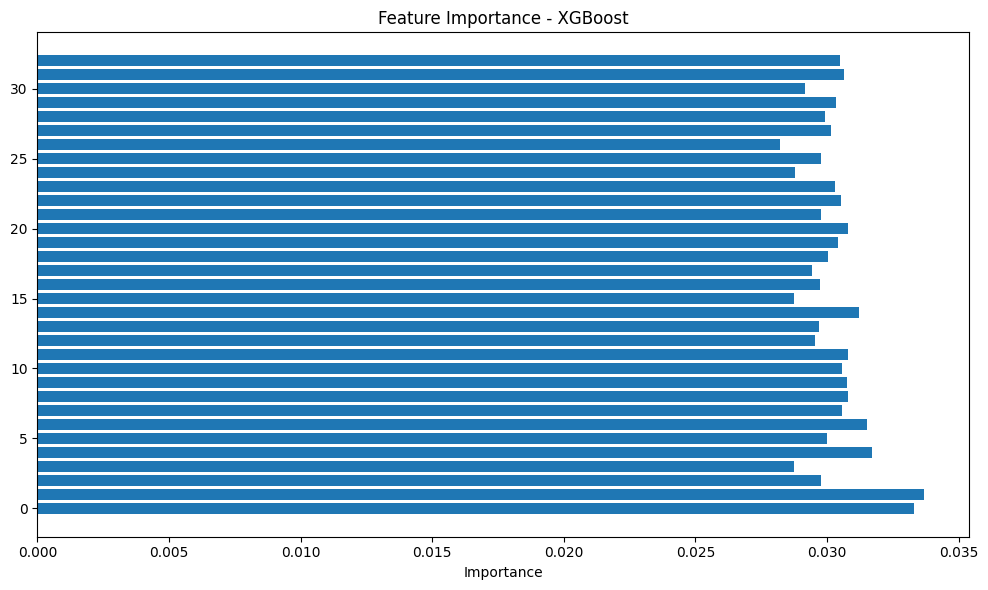

In [792]:
# 1. Vérifier le déséquilibre des classes
print("Distribution des classes:")
print(pd.Series(y_train).value_counts())
print("\nProportions:")
print(pd.Series(y_train).value_counts(normalize=True))

# 2. Normaliser les features numériques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Utiliser XGBoost avec scale_pos_weight pour classes imbalancées
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Calculer le poids pour les classes imbalancées
class_counts = pd.Series(y_train).value_counts()
scale_pos_weight = class_counts[0] / class_counts[1] if len(class_counts) > 1 else 1

xgb_model_v2 = XGBClassifier(
    random_state=0,
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    scale_pos_weight=scale_pos_weight,
    subsample=0.8,
    colsample_bytree=0.8,
    verbosity=0
)

# Entraîner avec données normalisées
xgb_model_v2.fit(X=X_train_scaled, y=y_train)

# Prédictions
y_pred_v2 = xgb_model_v2.predict(X_test_scaled)

# Résultats détaillés
print("XGBoost v2 Classification Report:")
print(classification_report(y_test, y_pred_v2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_v2))

# 4. Feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
feature_importance = xgb_model_v2.feature_importances_
plt.barh(range(len(feature_importance)), feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.tight_layout()
plt.show()